## Use Simple Kmeans, DBScan, Hierachical clustering algorithms for clustering. Compare the performance of clusters by changing the parameters involved in the algorithms.

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "2"
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [2]:
from sklearn.datasets import load_iris

In [3]:
species=load_iris()


In [4]:
species = load_iris()
print(type(species))
print(species.keys())
DFspecies=pd.DataFrame(data= np.c_[species['data'],species['target']],
                     columns= species['feature_names'] + ['target'])


<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
DFspecies['target']=DFspecies['target'].astype(int)
DFspecies['targetnames']=DFspecies['target']

In [6]:
DFspecies

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,targetnames
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [7]:
DFspecies.count()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
target               150
targetnames          150
dtype: int64

In [8]:
classnames={0:'setosa', 1:'versicolor', 2:'virginica'}
DFspecies['targetnames'] = DFspecies['targetnames'].map(classnames)

# print the DataFrame
print(DFspecies)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target targetnames  
0

In [9]:
X=DFspecies[DFspecies.columns[0:4]].values

In [10]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

(150, 2) (150, 4)
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523

Text(0.5, 1.0, 'Dimensionality Reduction')

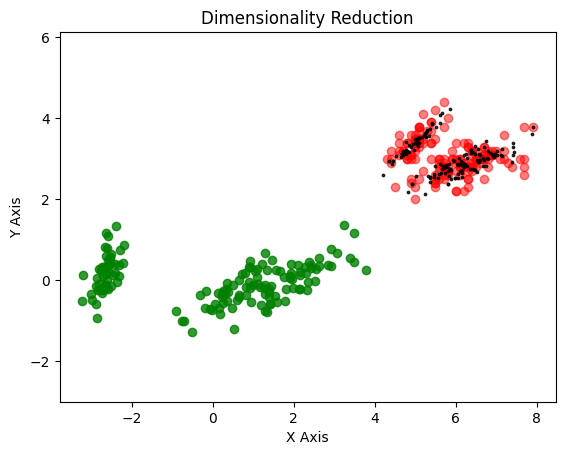

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X) #project X wrt first PC got using training data
print(X_pca.shape,X.shape)
#back to original data space
X_new = pca.inverse_transform(X_pca)
print(X_pca,"\n\n")
print(X_new)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5,c='r')
plt.scatter(X_new[:, 0], X_new[:, 1],s=3, alpha=0.8,c='k')
plt.scatter(X_pca[:, 0],X_pca[:, 1],  alpha=0.8,c='g')
plt.axis('equal')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Dimensionality Reduction')

## init: Method for initialization:{‘k-means++’, ‘random’,ndarray},  default=’k-means++’
n_init: 'auto’ or int, default=’auto’ : Number of times the k-means algorithm is run with different centroid seeds. The final results is the best output of n_init consecutive runs in terms of inertia. if kmeans++ is used, then n_init=1 else any integer. for random, it is 10

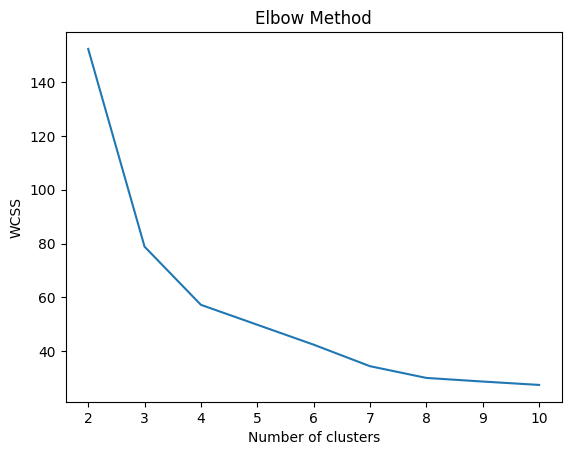

In [12]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 1, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
DFspecies.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'targetnames'],
      dtype='object')

# generating clustering scheme with varying noc (k=3,4,5) and plotting its purity

In [14]:
DFresult=pd.DataFrame(None,columns=['Clusters','Purity'])
DFresult
convert_dict = {'Clusters': int,
                'Purity': float
                }
for noc in range(3,6):    
    final_kmeans = KMeans(n_clusters=noc,init = 'k-means++').fit(X) # good results for annual_income vs spending_score
    # other_Kmeans = KMeans(n_clusters=10).fit(numeric) poor results
    DFspecies['netlabels']=final_kmeans.labels_
    cluster_purity = []

    # this loop iterates over each cluster label, with K = 3
    for cluster_label in range(noc):
        cluster_indices = np.where(final_kmeans.labels_ == cluster_label)[0]
        class_counts = np.bincount(DFspecies.target[cluster_indices])
        max_count = np.max(class_counts)
        total_records = len(cluster_indices)
        purity = max_count / total_records
        cluster_purity.append(purity)

    print(cluster_purity)
    average_purity = np.mean(cluster_purity)

    print(f"Average Cluster Purity: {average_purity}")
    DFresult.loc[len(DFresult.index)] = [noc,average_purity]

[np.float64(0.9473684210526315), np.float64(1.0), np.float64(0.7741935483870968)]
Average Cluster Purity: 0.907187323146576
[np.float64(1.0), np.float64(0.9230769230769231), np.float64(0.7704918032786885), np.float64(1.0)]
Average Cluster Purity: 0.9233921815889029
[np.float64(0.6388888888888888), np.float64(1.0), np.float64(1.0), np.float64(0.9642857142857143), np.float64(1.0)]
Average Cluster Purity: 0.9206349206349206


In [15]:
DFresult = DFresult.astype(convert_dict).copy()
print(DFresult.dtypes)
display(DFresult)

Clusters      int64
Purity      float64
dtype: object


,Clusters,Purity
0,3,0.907187
1,4,0.923392
2,5,0.920635


C:\Users\khush\AppData\Local\Temp\ipykernel_21784\1648758025.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Clusters", y="Purity", data=DFresult, palette = 'hls')


<Axes: xlabel='Clusters', ylabel='Purity'>

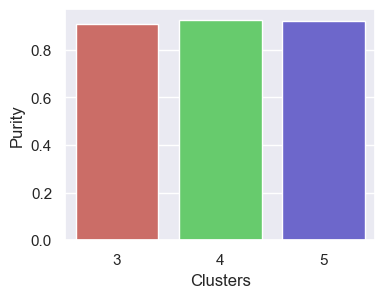

In [19]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(4,3)})
sns.barplot(x="Clusters", y="Purity", data=DFresult, palette = 'hls')

# Generate syntetic 2D data

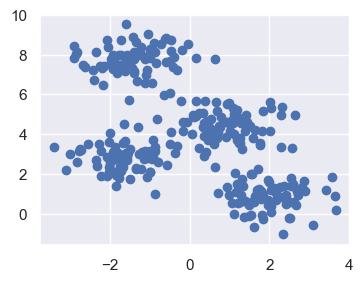

In [17]:
X, y = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.70, random_state = 0)
plt.scatter(X[:, 0], X[:, 1])

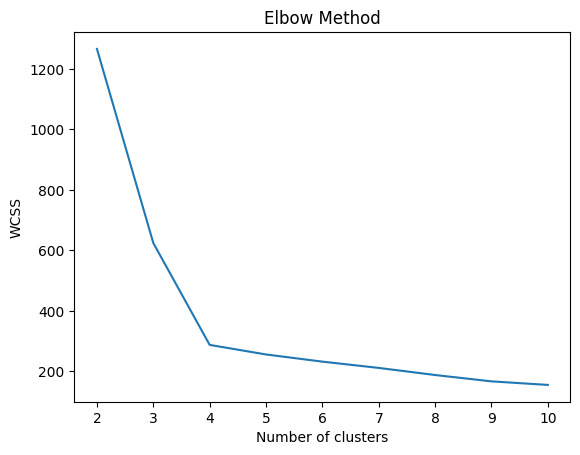

In [3]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## initial centroids in well-seperated clusters

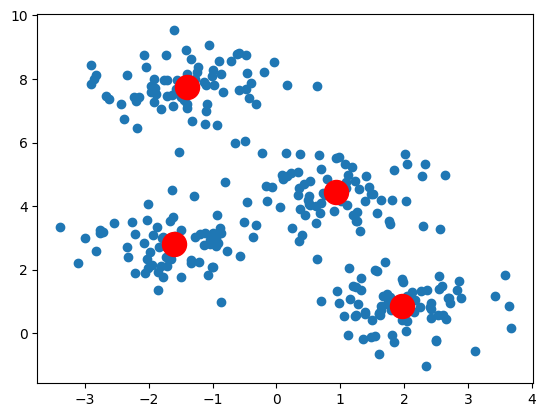

In [5]:
kmeans = KMeans(n_clusters = 4,init=[[2,1],[1,3],[-2,8],[1,7]])
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red')
plt.show()

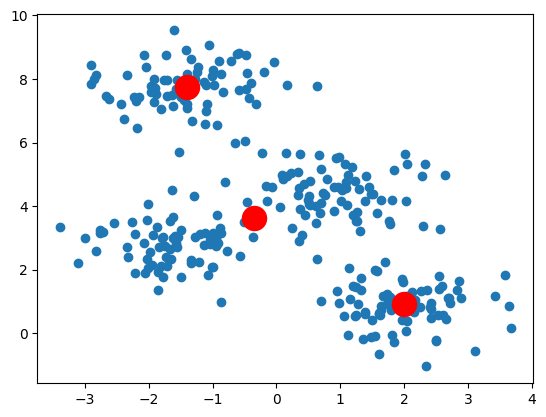

In [6]:
kmeans = KMeans(n_clusters = 3,init=[[2,4],[2,8],[-1,3]])
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red')
plt.show()

## initalized centroids

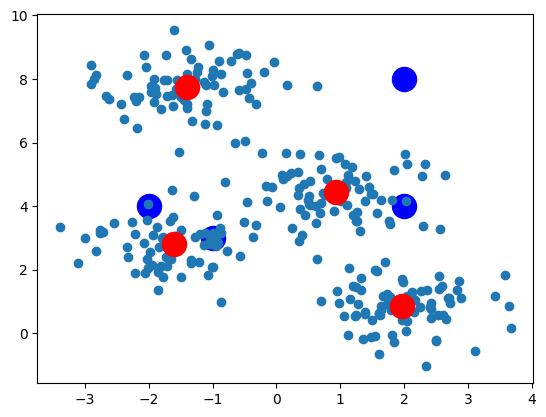

In [7]:
X, y = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.70, random_state = 0)
kmeans = KMeans(n_clusters = 4,init=[[2,4],[2,8],[-1,3],[-2,4]])
pred_y = kmeans.fit_predict(X)
plt.scatter([2,2,-1,-2],[4,8,3,4,], s = 300, c = 'blue')
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red')
plt.show()

# DBSCAN and Agglomerative Clustering

In [13]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

## default epsilon : 0.5 and minpoints:5, Noisy samples are given the label -1.

In [91]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [14]:
dbscan = DBSCAN(eps=0.6, min_samples=4, metric='euclidean')
dbscan.fit(X)

unique, frequency = np.unique(dbscan.labels_, return_counts = True)
# print unique values array
print("Unique Values:", unique)
 
# print frequency array
print("Frequency Values:", frequency)

Unique Values: [-1  0  1  2]
Frequency Values: [ 5 49 92  4]


## changing epsilon in for loop with fixed min samples=4

In [66]:
dfdbscanop=pd.DataFrame()
dictclustering=dict()

In [71]:
for epsilon in range (3,9,1):  
    dbscan = DBSCAN(eps=epsilon/10, min_samples=4, metric='euclidean')
    dbscan.fit(X)
    unique, frequency = np.unique(dbscan.labels_, return_counts = True)
    result = dict(zip(unique, frequency))
    dictclustering[str(epsilon/10)]=result
    dfdbscanop['eps'+str(epsilon/10)]=dbscan.labels_   


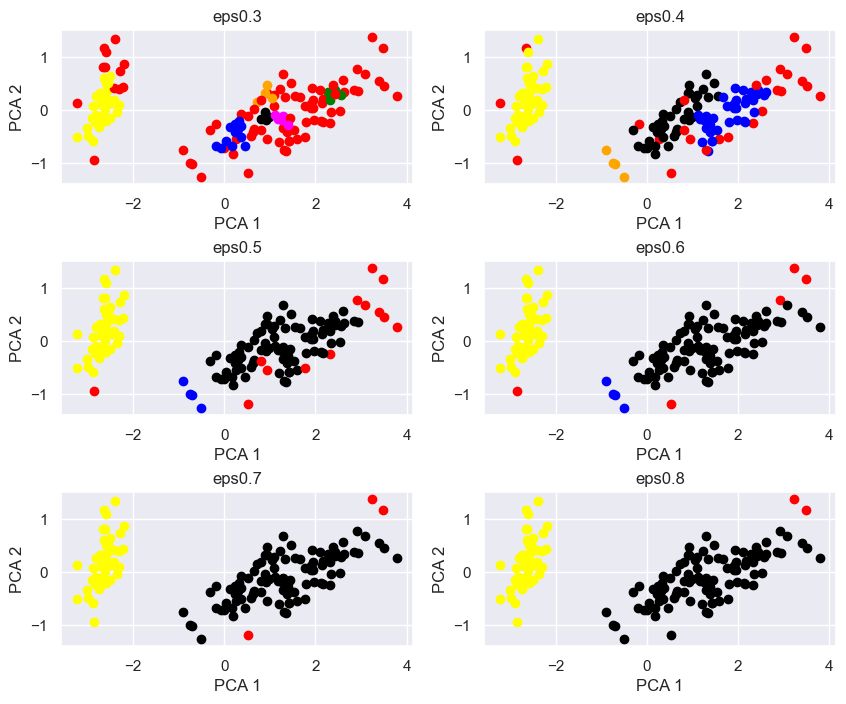

In [76]:
sns.set_theme(rc={'figure.figsize':(10,8)})
c = ['red', 'yellow', 'black', 'blue', 'orange','green','magenta']
fig, ax = plt.subplots(nrows=3, ncols=2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
j=0
for row in ax:
    for col in row:
        value=dfdbscanop[dfdbscanop.columns[j]]
        for i in range(150):
            if value[i] == -1:
                col.plot(X_pca[i, 0], X_pca[i, 1], color=c[0],marker='o')
            if value[i] == 0:
                col.plot(X_pca[i, 0], X_pca[i, 1], color=c[1],marker='o')
            elif value[i] == 1:
                col.plot(X_pca[i, 0], X_pca[i, 1], color=c[2],marker='o')
            elif value[i] == 2:
                col.plot(X_pca[i, 0], X_pca[i, 1], color=c[3],marker='o')
            elif value[i] == 3:
                col.plot(X_pca[i, 0], X_pca[i, 1], color=c[4],marker='o') 
            elif value[i] == 4:
                col.plot(X_pca[i, 0], X_pca[i, 1], color=c[5],marker='o')
            elif value[i] == 5:
                col.plot(X_pca[i, 0], X_pca[i, 1], color=c[6],marker='o')    
        j+=1
for i in range(3):
    for j in range(2):
        ax[i, j].set_title(dfdbscanop.columns[2*i+j])
        ax[i, j].set_xlabel('PCA 1')
        ax[i, j].set_ylabel('PCA 2')
plt.show()

## changing  min samples with fixed epsioln

In [82]:
dfdbscanop=pd.DataFrame()
dictclustering=dict()

In [83]:
for sample in range (3,9,1):  
    dbscan = DBSCAN(eps=0.4, min_samples=sample, metric='euclidean')
    dbscan.fit(X)
    unique, frequency = np.unique(dbscan.labels_, return_counts = True)
    result = dict(zip(unique, frequency))
    dictclustering[str(epsilon/10)]=result
    dfdbscanop['sample'+str(sample)]=dbscan.labels_   


In [84]:
dfdbscanop

,sample3,sample4,sample5,sample6,sample7,sample8
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
145,3,2,3,3,4,-1
146,3,2,2,2,-1,-1
147,3,2,3,3,4,-1
148,3,2,3,3,-1,-1


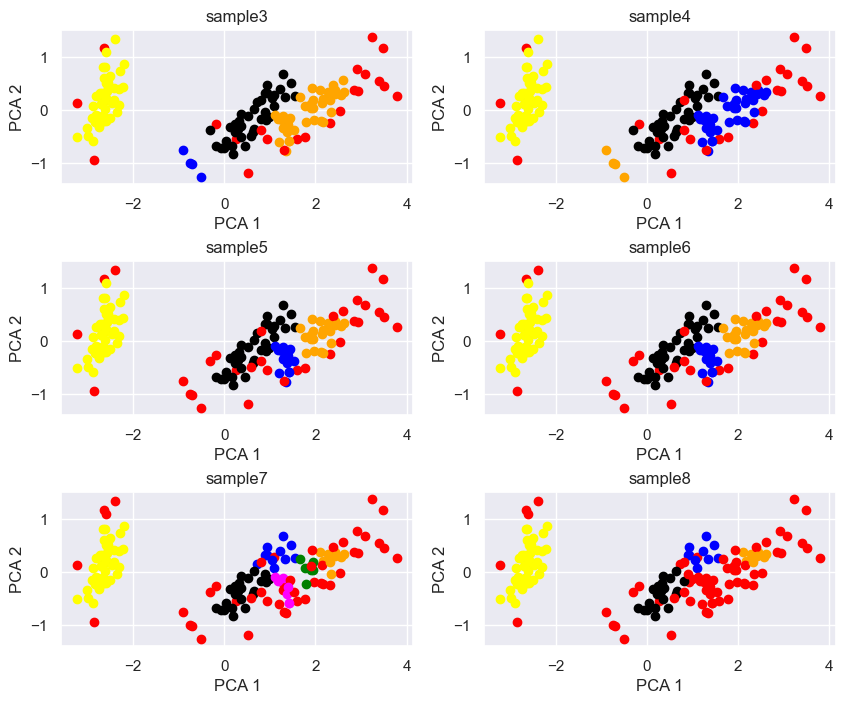

In [85]:
sns.set_theme(rc={'figure.figsize':(10,8)})
c = ['red', 'yellow', 'black', 'blue', 'orange','green','magenta']
fig, ax = plt.subplots(nrows=3, ncols=2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
j=0
for row in ax:
    for col in row:
        value=dfdbscanop[dfdbscanop.columns[j]]
        for i in range(150):
            if value[i] == -1:
                col.plot(X_pca[i, 0], X_pca[i, 1], color=c[0],marker='o')
            if value[i] == 0:
                col.plot(X_pca[i, 0], X_pca[i, 1], color=c[1],marker='o')
            elif value[i] == 1:
                col.plot(X_pca[i, 0], X_pca[i, 1], color=c[2],marker='o')
            elif value[i] == 2:
                col.plot(X_pca[i, 0], X_pca[i, 1], color=c[3],marker='o')
            elif value[i] == 3:
                col.plot(X_pca[i, 0], X_pca[i, 1], color=c[4],marker='o') 
            elif value[i] == 4:
                col.plot(X_pca[i, 0], X_pca[i, 1], color=c[5],marker='o')
            elif value[i] == 5:
                col.plot(X_pca[i, 0], X_pca[i, 1], color=c[6],marker='o')    
        j+=1
for i in range(3):
    for j in range(2):
        ax[i, j].set_title(dfdbscanop.columns[2*i+j])
        ax[i, j].set_xlabel('PCA 1')
        ax[i, j].set_ylabel('PCA 2')
plt.show()

# Agglomerative clustering

In [18]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

## plot top 4 levels p=4

### Setting distance_threshold=0 means full tree we want. By default linkage is ward
### linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’

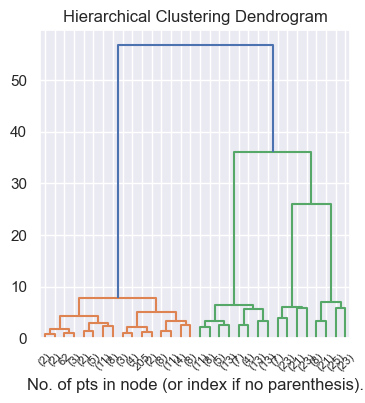

In [19]:
from scipy.cluster.hierarchy import dendrogram
sns.set_theme(rc={'figure.figsize':(4,4)})
agglomerative = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model=agglomerative.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=4)
plt.xlabel("No. of pts in node (or index if no parenthesis).")
plt.show()

## explicitly mentioning the  required number of clusters

In [23]:
agglomerative = AgglomerativeClustering( n_clusters=4,linkage='ward')
model=agglomerative.fit(X)
unique, frequency = np.unique(model.labels_, return_counts = True)

In [24]:
frequency

array([75, 77, 74, 74], dtype=int64)